In [1]:
import numpy as np
import copy
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import mylibrary.nnlib as tnn

In [127]:
## Maxout Function

class Maxout1D(tnn.Layer):
    
    def __init__(self, input_dim, n_units, optimizer):
        self.linear = tnn.LinearLayer(input_dim, n_units, optimizer=optimizer)
        
        self.input = None
        self.zee = None
        self.argmax = None
        self.del_zee = None
        self.del_input = None
    
    def forward(self, input):
        self.input = input
        self.zee = self.linear.forward(input)
        self.argmax = np.argmax(self.zee, axis=1).reshape(-1,1)
        self.output = np.take_along_axis(self.zee, self.argmax, axis=1)
#         print(self.output.shape)
        return self.output
    
    def backward(self, output_delta):
        self.del_zee = np.zeros_like(self.zee)
        np.put_along_axis(self.del_zee, self.argmax, output_delta, axis=1)
        self.del_input = self.linear.backward(self.del_zee)
        return self.del_input
    
    def update(self):
        self.linear.update()

### 1D Regression Dataset

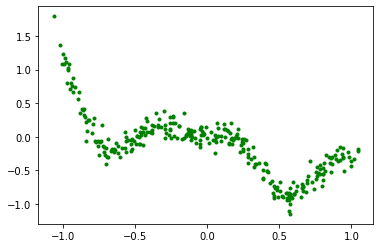

In [128]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
y = -y

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

In [129]:
optimizer = tnn.Adam(0.01)
net = Maxout1D(1, 4, optimizer)

In [130]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    net.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')

        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.3039321757703638


100 Error =  0.08541192036350753


200 Error =  0.0799224067881986


300 Error =  0.0751762666956845


400 Error =  0.07153384797458763


500 Error =  0.06875091181135612


600 Error =  0.06660515516056566


700 Error =  0.06486172266703916


800 Error =  0.06349449299696053


900 Error =  0.062469567804731695


1000 Error =  0.061557142808604796


1100 Error =  0.0608055641120679


1200 Error =  0.06022155282252381


1300 Error =  0.05972335375482257


1400 Error =  0.05927585350671139


1500 Error =  0.05889103294996809


1600 Error =  0.05858623144278074


1700 Error =  0.05831590804584342


1800 Error =  0.0580711218474827


1900 Error =  0.05785170477923418


2000 Error =  0.05765668404510445


TclError: invalid command name "pyimage284"

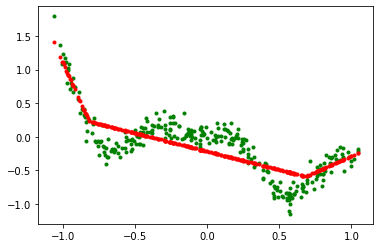

In [131]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')

### 2D Regression Dataset

In [132]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

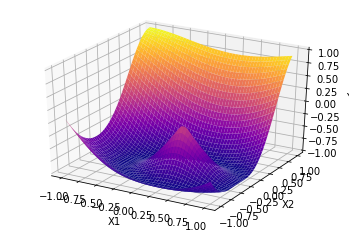

In [133]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1
Y = -Y

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [134]:
optimizer = tnn.Adam(0.03)
net = Maxout1D(2, 15, optimizer)

In [135]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    net.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  5.98818172443803


100 Error =  0.0661263291067011


200 Error =  0.02392750213985382


300 Error =  0.020676051469323876


400 Error =  0.019985528223074818


500 Error =  0.019658835203991434


600 Error =  0.01946309998806765


700 Error =  0.019330574480367888


800 Error =  0.019235408692339504


900 Error =  0.01916974661065161


1000 Error =  0.019116962847237982


1100 Error =  0.01907594775494299


1200 Error =  0.01904611970308122


1300 Error =  0.019023142790427064


1400 Error =  0.01900267004932342


1500 Error =  0.018984334581080415


1600 Error =  0.01895363110747318


1700 Error =  0.018936250777212


TclError: invalid command name "."

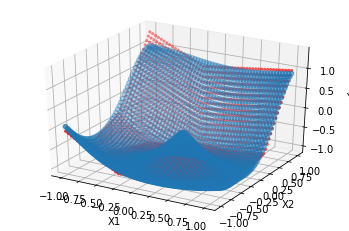

In [136]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()